In [1]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D,BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.regularizers import l2

Using TensorFlow backend.


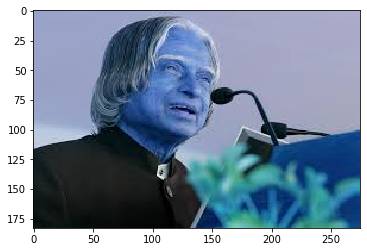

In [2]:
data='C:/Intel/train'
categories=['apj','person2','person','nehru']
for category in categories:
    path=os.path.join(data,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
      

In [3]:
def training():
    data='C:/Intel/train'
    categories=['apj','person1','nehru','person2','person3']
    training_data=[]
    IMG_SIZE=100
    for category in categories:
        path=os.path.join(data,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                gray=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
                now_array=cv2.resize(gray,(IMG_SIZE,IMG_SIZE))
                training_data.append([now_array,class_num])
            except Exception as e:
                pass
    return training_data          

In [132]:
training()

[[array([[172, 172, 172, ..., 181, 181, 181],
         [172, 172, 172, ..., 181, 181, 181],
         [172, 172, 172, ..., 181, 181, 181],
         ...,
         [ 15,  14,  13, ...,  77,  77,  80],
         [ 18,  17,  16, ...,  82,  80,  84],
         [ 21,  20,  19, ...,  84,  83,  83]], dtype=uint8), 0],
 [array([[ 22,  22,  23, ..., 160, 158, 158],
         [ 25,  26,  27, ..., 160, 158, 158],
         [ 30,  30,  31, ..., 162, 158, 158],
         ...,
         [ 10,   9,   8, ...,  67,  57,  30],
         [  9,   8,   8, ...,  69,  45,  46],
         [  8,   8,   8, ..., 109,  55,  74]], dtype=uint8), 0],
 [array([[ 67,  64,  59, ..., 255, 255, 255],
         [ 58,  54,  47, ..., 255, 255, 255],
         [ 48,  44,  37, ..., 255, 255, 255],
         ...,
         [ 23,  26,  31, ...,  13,  12,  13],
         [ 25,  28,  32, ...,  19,  16,  15],
         [ 26,  29,  34, ...,  28,  22,  19]], dtype=uint8), 0],
 [array([[189, 190, 191, ..., 200, 200, 200],
         [189, 190, 191, ..

In [4]:

    import random
    random.shuffle(training())
    x=[]
    y=[]
    for features,label in training():
        x.append(features)
        y.append(label)
    x=np.array(x).reshape(-1,100,100,1)
    y=np.array(y)
    x_train=x/255
    model=Sequential()
    model.add(Conv2D(64,(7,7),activation='relu',input_shape=(x_train.shape[1:]),kernel_regularizer=l2(0.01)))
    model.add(MaxPool2D(pool_size=(3,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(1,1),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(3,3)))
    model.add(Conv2D(192,(1,1),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(192,(3,3),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(384,(1,1),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(256,(1,1),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(256,(3,3),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(256,(1,1),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(Conv2D(256,(3,3),activation='relu',kernel_regularizer=l2(0.0005)))
    model.add(MaxPool2D(pool_size=(3,3)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(5,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    out=model.fit(x_train,y,epochs=5)
    #model.save('pred.h5')
    #model1=tf.keras.models.load_model('pred.h5')
    #return model1

Epoch 1/5
789/789 [==============================] - 31s 39ms/step - loss: 2.0824 - accuracy: 0.3815
Epoch 2/5
789/789 [==============================] - 29s 37ms/step - loss: 1.7774 - accuracy: 0.4715
Epoch 3/5
789/789 [==============================] - 29s 37ms/step - loss: 1.5730 - accuracy: 0.4702
Epoch 4/5
789/789 [==============================] - 29s 37ms/step - loss: 1.3461 - accuracy: 0.5234
Epoch 5/5
789/789 [==============================] - 29s 37ms/step - loss: 1.1103 - accuracy: 0.5932


In [ ]:
model_build()

In [7]:
def prediction():
    import cv2
    from PIL import Image
    from mtcnn.mtcnn import MTCNN
    import numpy as np
    import face_recognition
    import tkinter as tk
    from tkinter import filedialog
    f=filedialog.askopenfilename()
    im=Image.open(f).convert('RGBA')
    bg=Image.new('RGB',im.size,(255,0,0))
    x,y=im.size
    print(im.size)
    bg.paste(im,(0,0,x,y),im)
    bg.save('file.jpg',quality=95)
    #gray=cv2.cvtColor(im_ary,cv2.COLOR_BGR2GRAY)
    detector=MTCNN()
    image = face_recognition.load_image_file('file.jpg')
    # detect faces from input image.
    face_locations = detector.detect_faces(image)
    # draw bounding box and five facial landmarks of detected face
    for face in face_locations:
        (x, y, w, h) = face['box']
        landmarks = face['keypoints']
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        #img=Image.fromarray(image)
        #for key, point in landmarks.items():
        #cv2.circle(image, point, 2, (255, 0, 0), 6)
        IMG_SIZE=100
        im=cv2.imread(f,cv2.IMREAD_GRAYSCALE)
        rsz=cv2.resize(im,(IMG_SIZE,IMG_SIZE))
        x_test=np.array(rsz,np.float32).reshape(1,IMG_SIZE,IMG_SIZE,1)
        pred= model.predict(x_test)
        li=np.concatenate(pred).ravel().tolist()
        print(li)
        plt.imshow(image)
        plt.show()
        final=np.argsort(li)
        print(final)
        categories=['apj','person1','nehru','person2','person3']
        result=categories[min(final[0])]
        print(result)
        break
        


(390, 280)
[0.0, 0.0, 1.0, 0.0, 0.0]


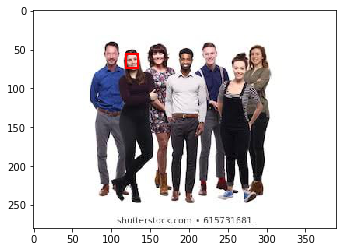

2
nehru


In [13]:
prediction()